
# **1.0 Business Understanding**  

## **1.1 Background**  
Cardiovascular diseases (CVDs), including heart attacks, are a leading cause of death worldwide, and India has seen a significant rise in heart-related illnesses over the past few decades. According to the **World Health Organization (WHO) and Indian Council of Medical Research (ICMR)**, heart disease accounts for nearly **28% of all deaths in India**, with urban populations being particularly vulnerable due to sedentary lifestyles, poor dietary habits, and rising stress levels.  

Several **lifestyle choices**, such as **smoking, alcohol consumption, poor diet, and lack of physical activity**, significantly increase the risk of heart attacks. Additionally, **genetic predisposition, pre-existing medical conditions (hypertension, diabetes, obesity), and environmental factors (air pollution, healthcare access, emergency response time)** play a crucial role in determining cardiovascular health. The **economic divide** also impacts healthcare accessibility, as people from lower-income backgrounds often lack proper medical attention, increasing the risk of undiagnosed or unmanaged heart conditions.  

Given this multifaceted problem, **predictive analytics and machine learning** can help in early detection, personalized risk assessment, and preventive healthcare strategies.  


## **1.2 Problem Statement**  
Despite advances in medical science, **early detection of heart attack risk remains a challenge in India** due to varying access to healthcare, lack of regular checkups, and the **complex interplay of multiple risk factors**. The current healthcare system **reacts to heart attacks rather than preventing them**, leading to high fatality rates and long-term health complications.  

This study aims to **analyze the key risk factors of heart attacks** and develop a **predictive model** that can identify high-risk individuals based on **demographic, lifestyle, medical, and socioeconomic data**. By leveraging data-driven insights, **preventive measures and early interventions** can be implemented to reduce heart attack occurrences and improve overall cardiovascular health outcomes.  


## **1.3 Project Aim**  
The project aims to **understand key factors contributing to heart attacks in India** and develop a **machine learning model** that predicts heart attack risk based on individual health and lifestyle characteristics. The insights will help in **preventive healthcare strategies** by identifying **high-risk individuals** before they experience a cardiac event.  


## **1.4 Objectives**  
1. Identify trends, correlations, and key factors influencing heart attack risk.  
2. Develop a machine learning model to assess an individual’s heart attack risk based on health and lifestyle data.  


# **1.5 Data Understanding**  

## **1.6 Data Source**  
The dataset contains information on **10,000 patients from different states in India** and includes **26 features** capturing demographics, medical history, lifestyle, socioeconomic factors, and environmental influences. The data structure allows for a **comprehensive analysis of heart attack risk factors**, making it suitable for both **descriptive analysis (EDA) and predictive modeling**.  


## **1.7 Dataset Overview**  

| **Feature Category**        | **Feature Name**              | **Description** |
|-----------------------------|------------------------------|----------------|
| **Demographics**            | `Patient_ID`                 | Unique identifier for each patient. |
|                             | `State_Name`                 | Indian state where the patient resides. |
|                             | `Age`                        | Age of the patient. |
|                             | `Gender`                     | Gender of the patient (`Male`/`Female`). |
| **Medical Conditions**      | `Diabetes`                   | Whether the patient has diabetes (`0 = No`, `1 = Yes`). |
|                             | `Hypertension`               | Whether the patient has high blood pressure (`0 = No`, `1 = Yes`). |
|                             | `Obesity`                    | Whether the patient is obese (`0 = No`, `1 = Yes`). |
|                             | `Cholesterol_Level`          | Total cholesterol level (numerical). |
|                             | `Triglyceride_Level`         | Triglyceride level in blood (numerical). |
|                             | `LDL_Level`                  | Low-density lipoprotein cholesterol (bad cholesterol). |
|                             | `HDL_Level`                  | High-density lipoprotein cholesterol (good cholesterol). |
|                             | `Systolic_BP`                | Systolic blood pressure reading. |
|                             | `Diastolic_BP`               | Diastolic blood pressure reading. |
| **Lifestyle Factors**       | `Smoking`                    | Whether the patient smokes (`0 = No`, `1 = Yes`). |
|                             | `Alcohol_Consumption`        | Whether the patient consumes alcohol (`0 = No`, `1 = Yes`). |
|                             | `Physical_Activity`          | Whether the patient is physically active (`0 = No`, `1 = Yes`). |
|                             | `Diet_Score`                 | A numerical score representing diet quality. |
| **Environmental & Genetic** | `Air_Pollution_Exposure`     | Whether the patient is exposed to air pollution (`0 = No`, `1 = Yes`). |
|                             | `Family_History`             | Whether there is a family history of heart disease (`0 = No`, `1 = Yes`). |
|                             | `Stress_Level`               | A stress level rating from `1` to `10`. |
| **Socioeconomic & Healthcare** | `Healthcare_Access`      | Whether the patient has access to healthcare (`0 = No`, `1 = Yes`). |
|                             | `Emergency_Response_Time`    | Time taken for emergency response in minutes. |
|                             | `Annual_Income`              | The patient’s annual income (numerical). |
|                             | `Health_Insurance`           | Whether the patient has health insurance (`0 = No`, `1 = Yes`). |
| **Heart Attack History & Risk** | `Heart_Attack_History` | Whether the patient has had a previous heart attack (`0 = No`, `1 = Yes`). |
|                             | `Heart_Attack_Risk`          | **Target variable** (`0 = Low Risk`, `1 = High Risk`). |


# **3.0 Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve

# **4.0 Data Overview**

In [ ]:

class DataOverview:
    def __init__(self, df: pd.DataFrame):
        """
        Initialize the DataOverview class with a DataFrame.
        :param df: Pandas DataFrame
        """
        self.df = df
    
    def get_info(self):
        """Display DataFrame information."""
        print("\nDataset Information:")
        print(self.df.info())
        
    def get_head_tail(self, n=5):
        """Display first and last n rows."""
        print("\nFirst {} Rows:".format(n))
        print(self.df.head(n))
        print("\nLast {} Rows:".format(n))
        print(self.df.tail(n))
        
    def get_statistics(self):
        """Display summary statistics of numerical columns."""
        print("\nSummary Statistics:")
        print(self.df.describe())
        
    def check_missing_values(self):
        """Check for missing values in the dataset."""
        print("\nMissing Values:")
        missing = self.df.isnull().sum()
        print(missing[missing > 0])
        
    def check_duplicates(self):
        """Check for duplicate rows in the dataset."""
        print("\nDuplicate Rows:")
        print(self.df.duplicated().sum())
        
    def check_unique_values(self):
        """Display the number of unique values per column."""
        print("\nUnique Values per Column:")
        print(self.df.nunique())
        
    def check_data_types(self):
        """Display data types of all columns."""
        print("\nData Types:")
        print(self.df.dtypes)
    
    def full_overview(self):
        """Run all overview functions sequentially."""
        self.get_info()
        self.get_head_tail()
        self.get_statistics()
        self.check_missing_values()
        self.check_duplicates()
        self.check_unique_values()
        self.check_data_types()

df = pd.read_csv("data/heart_attack_prediction_india.csv")
overview = DataOverview(df)
overview.full_overview()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Patient_ID               10000 non-null  int64 
 1   State_Name               10000 non-null  object
 2   Age                      10000 non-null  int64 
 3   Gender                   10000 non-null  object
 4   Diabetes                 10000 non-null  int64 
 5   Hypertension             10000 non-null  int64 
 6   Obesity                  10000 non-null  int64 
 7   Smoking                  10000 non-null  int64 
 8   Alcohol_Consumption      10000 non-null  int64 
 9   Physical_Activity        10000 non-null  int64 
 10  Diet_Score               10000 non-null  int64 
 11  Cholesterol_Level        10000 non-null  int64 
 12  Triglyceride_Level       10000 non-null  int64 
 13  LDL_Level                10000 non-null  int64 
 14  HDL_Level        

### **Observations**  

1. The dataset consists of **10,000 records and 26 features**, covering a wide range of demographic, medical, lifestyle, and socioeconomic factors relevant to heart attack risk.  

2. There are **no missing values or duplicate records**, ensuring that data completeness will not be a major issue in further analysis or model training.  

3. The dataset contains **24 numerical features and 2 categorical features** (`State_Name` and `Gender`), with some numerical variables being binary indicators (e.g., `Diabetes`, `Smoking`, `Health_Insurance`).  

4. **The target variable (`Heart_Attack_Risk`) is binary (0 = Low Risk, 1 = High Risk)**, making this a classification problem suitable for machine learning models.  

5. Certain features like **`Annual_Income` (9979 unique values) and `Emergency_Response_Time` (390 unique values)** have a high variability, indicating they may require scaling or transformation for modeling.  

6. Some **binary features (e.g., `Smoking`, `Obesity`, `Healthcare_Access`) show notable variations**, which could help in understanding their impact on heart attack risks through correlation analysis and predictive modeling.  


## **5.0 Data Preparation and Manipulation** 

## **6.0 Exploratory Data Analysis**


Univariate Analysis:


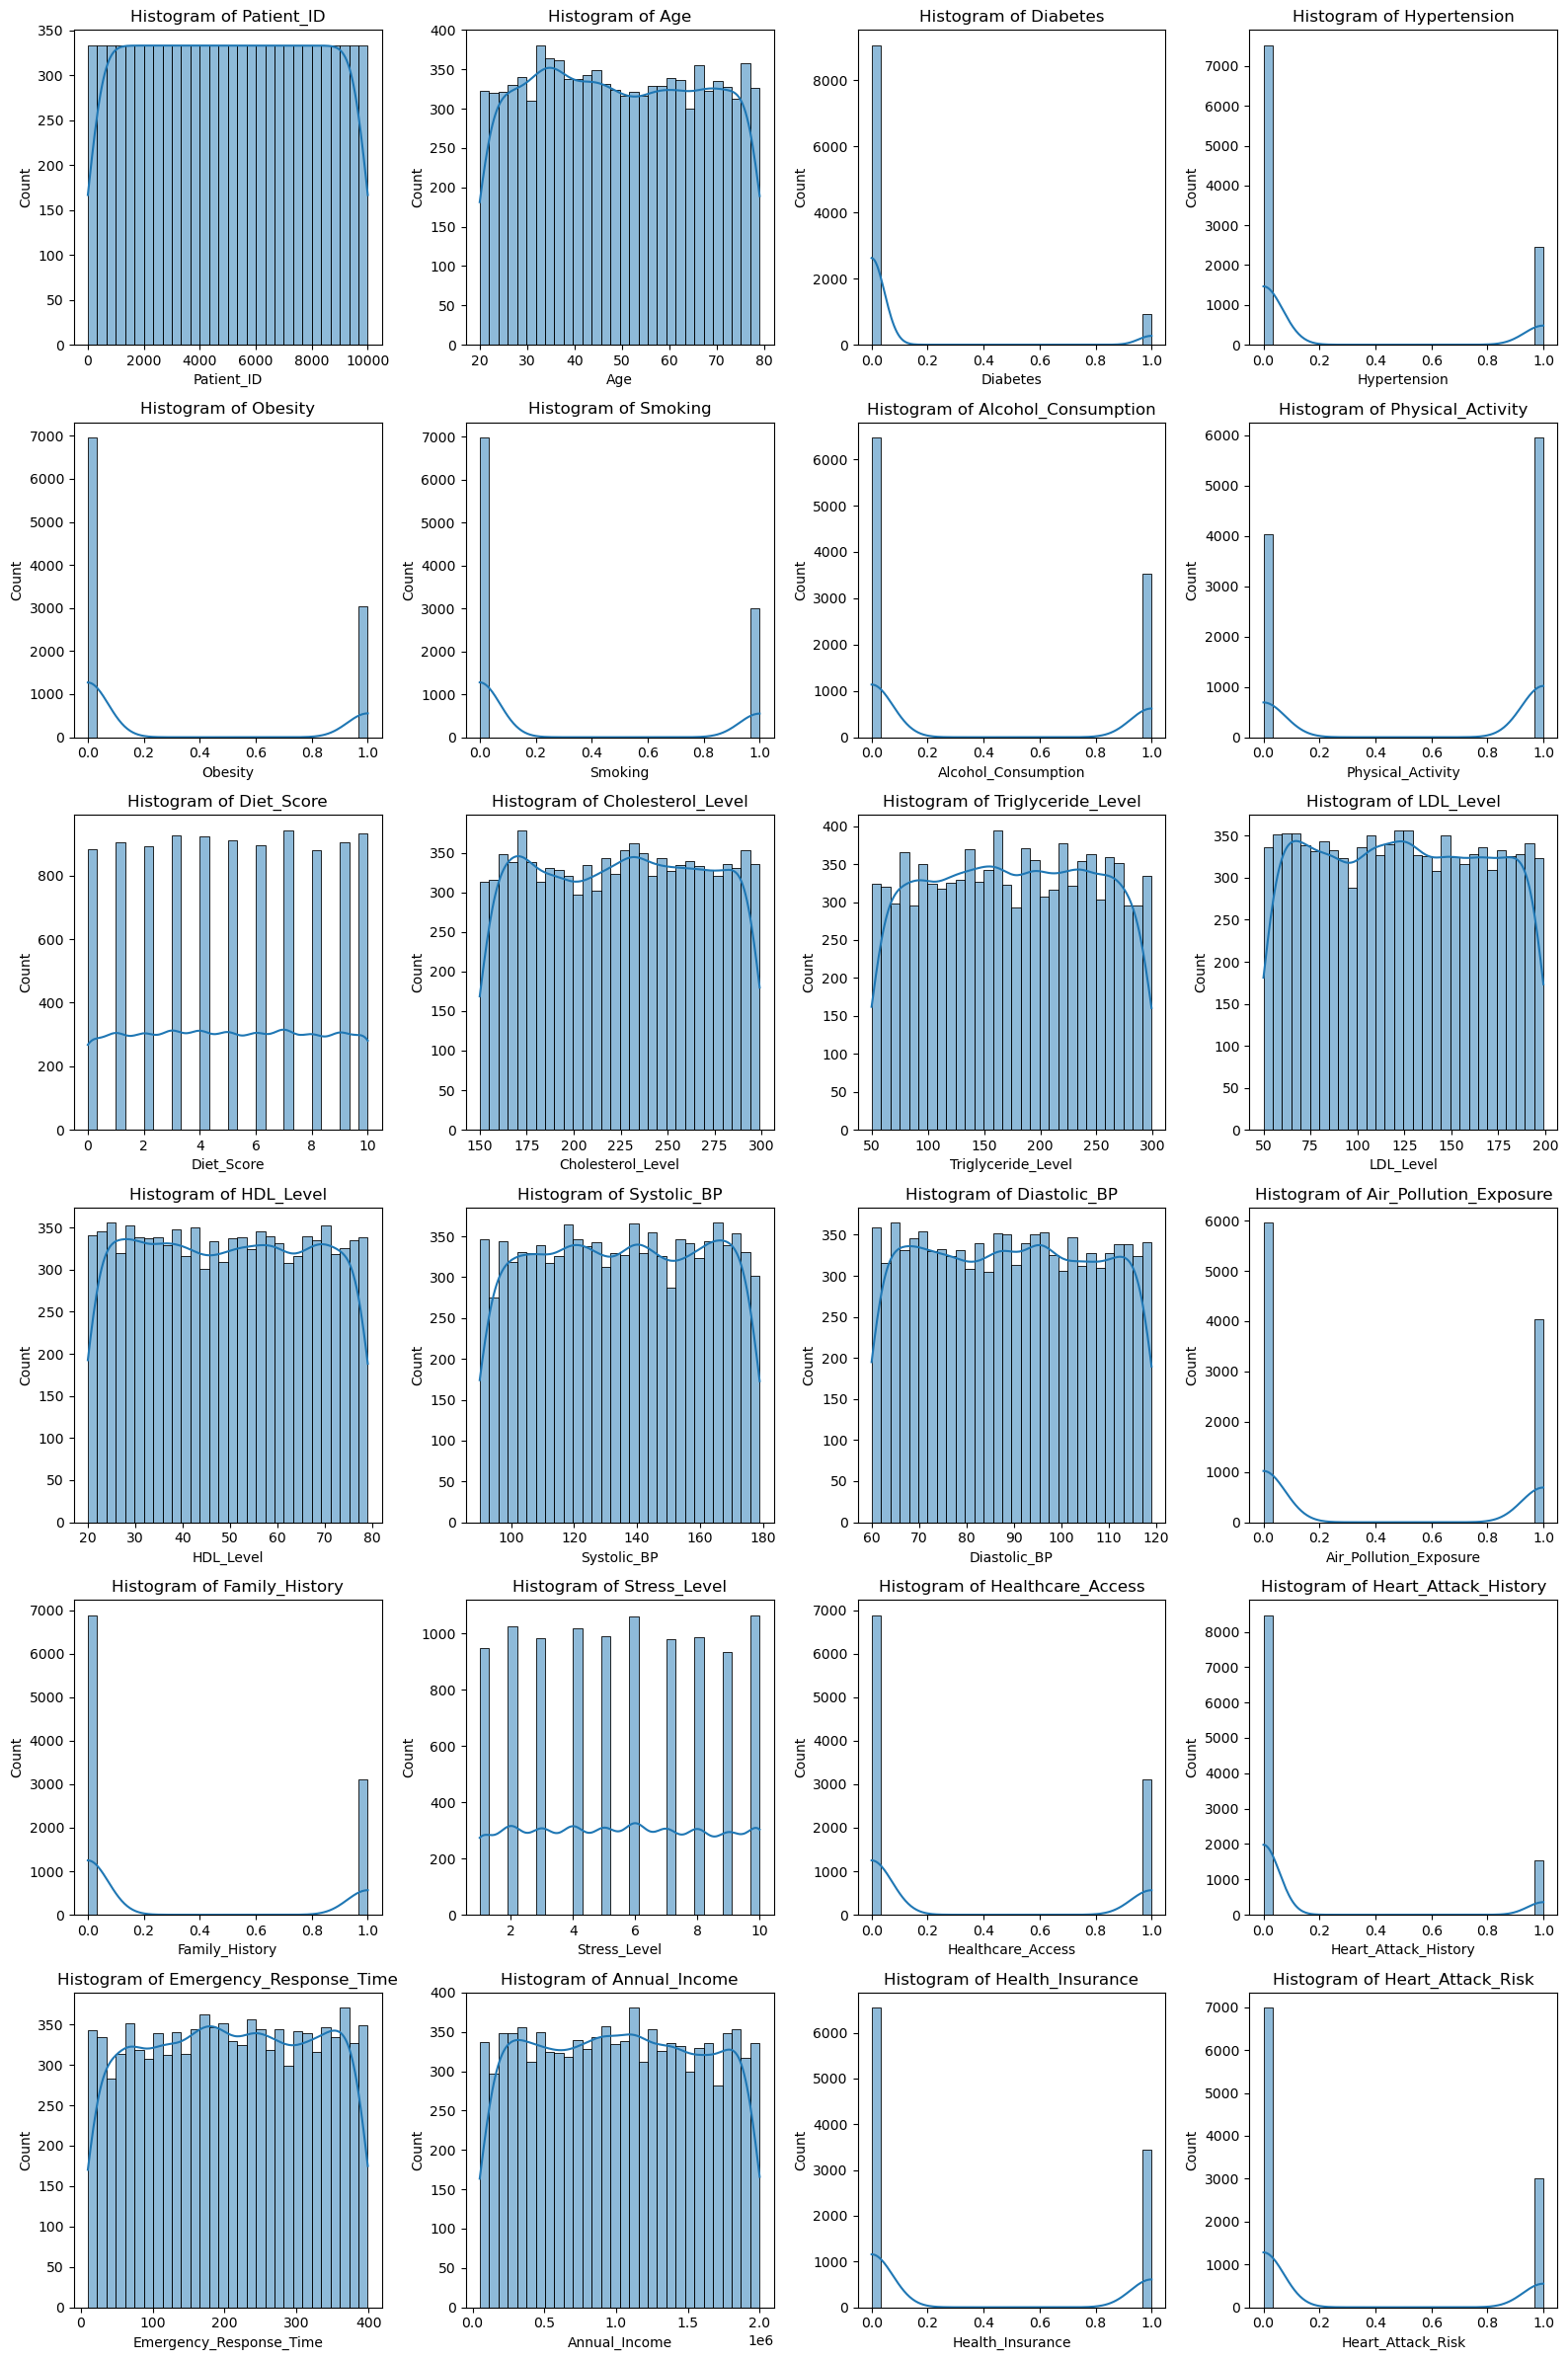

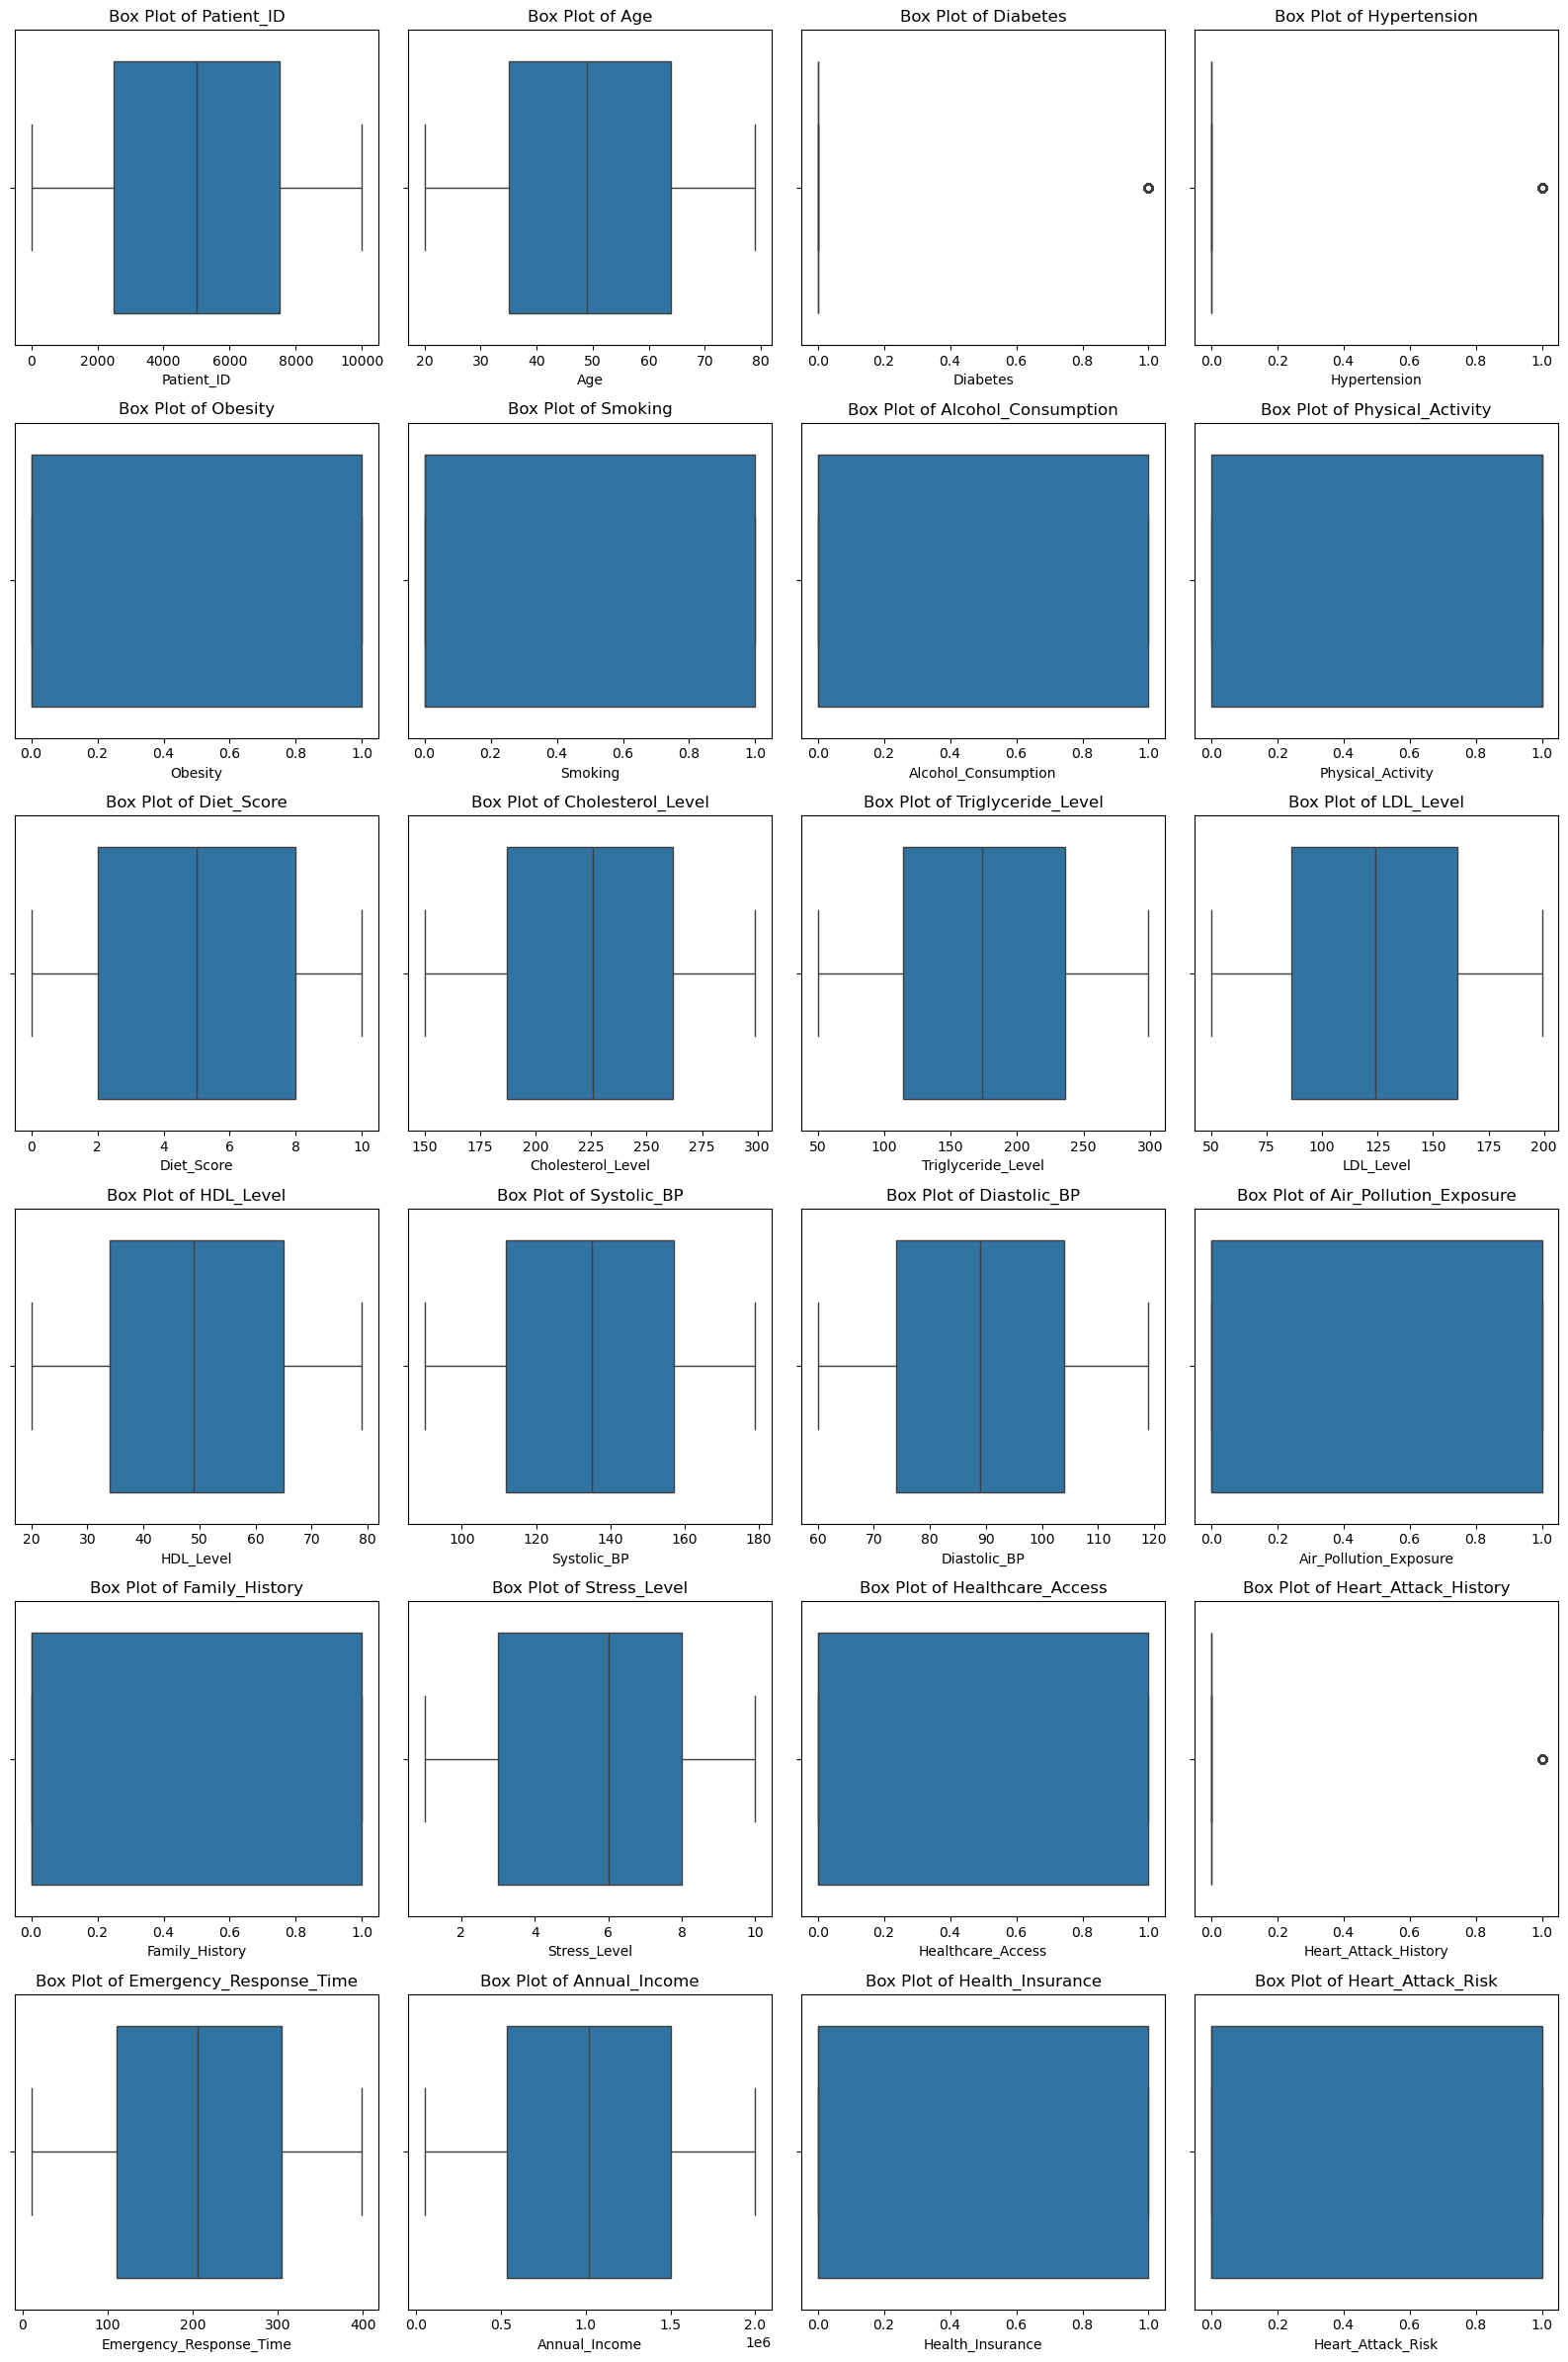

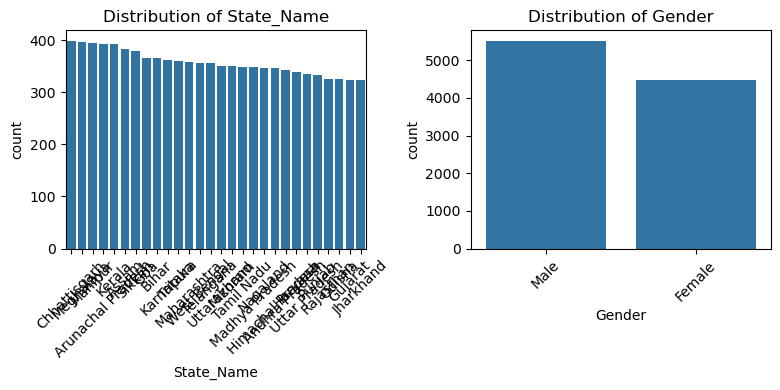


Bivariate Analysis:


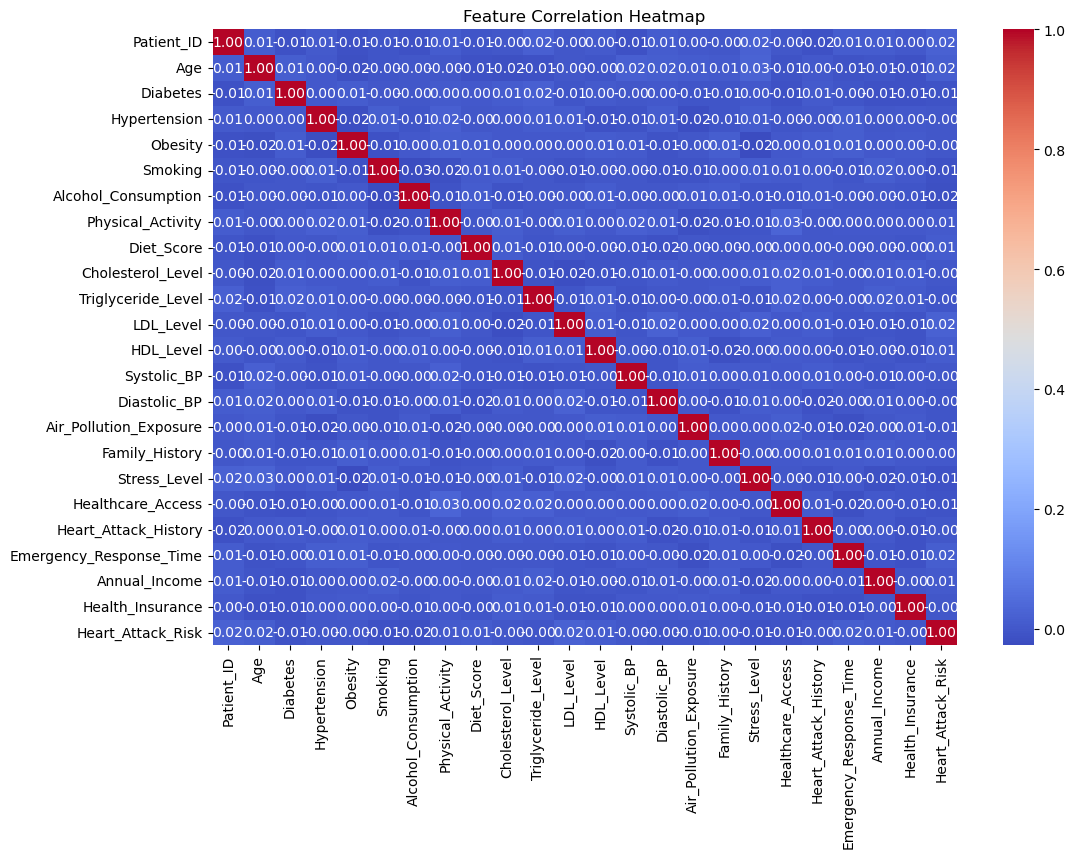

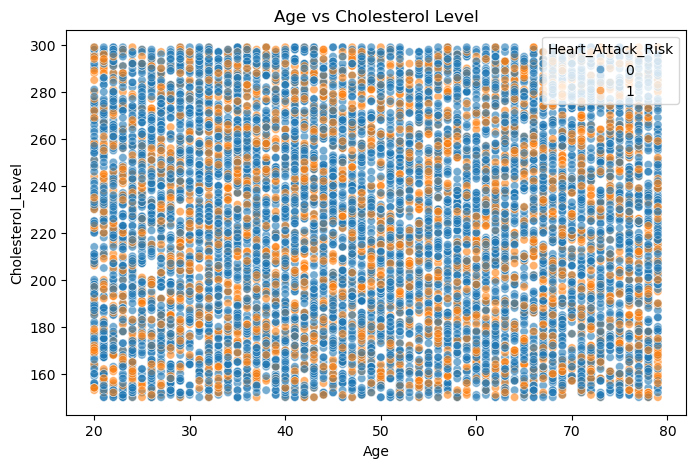

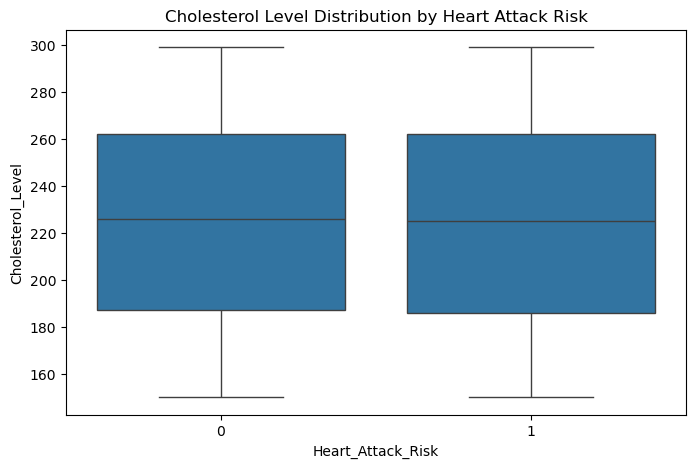


Multivariate Analysis:


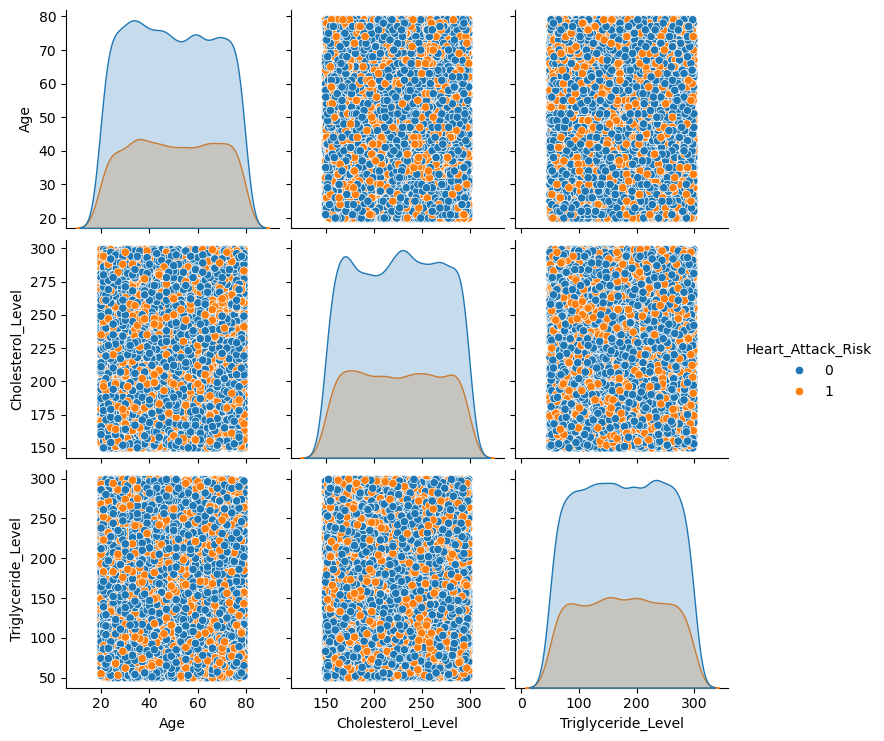

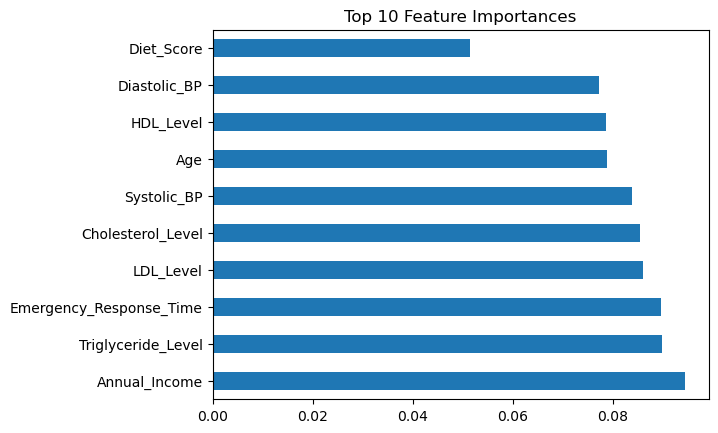

In [5]:


class DataEDA:
    def __init__(self, df: pd.DataFrame):
        """Initialize the class with the dataset."""
        self.df = df
    
    def univariate_analysis(self):
        """Perform univariate analysis on numerical and categorical columns."""
        print("\nUnivariate Analysis:")
        
        # Identify numerical and categorical columns
        num_cols = self.df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        cat_cols = self.df.select_dtypes(include=['object']).columns.tolist()
        
        # Histograms for numerical features (4 columns layout)
        num_plots = len(num_cols)
        rows = (num_plots // 4) + (num_plots % 4 > 0)
        fig, axes = plt.subplots(rows, 4, figsize=(16, rows * 4))
        axes = axes.flatten()
        
        for i, col in enumerate(num_cols):
            sns.histplot(self.df[col], bins=30, kde=True, ax=axes[i])
            axes[i].set_title(f"Histogram of {col}")
        
        for i in range(num_plots, len(axes)):
            fig.delaxes(axes[i])  # Remove empty subplots
        
        plt.tight_layout()
        plt.show()
        
        # Boxplots for numerical features (4 columns layout)
        fig, axes = plt.subplots(rows, 4, figsize=(16, rows * 4))
        axes = axes.flatten()
        
        for i, col in enumerate(num_cols):
            sns.boxplot(x=self.df[col], ax=axes[i])
            axes[i].set_title(f"Box Plot of {col}")
        
        for i in range(num_plots, len(axes)):
            fig.delaxes(axes[i])
        
        plt.tight_layout()
        plt.show()
        
        # Count plots for categorical features
        cat_plots = len(cat_cols)
        rows = (cat_plots // 4) + (cat_plots % 4 > 0)
        fig, axes = plt.subplots(rows, 4, figsize=(16, rows * 4))
        axes = axes.flatten()
        
        for i, col in enumerate(cat_cols):
            sns.countplot(x=self.df[col], order=self.df[col].value_counts().index, ax=axes[i])
            axes[i].set_title(f"Distribution of {col}")
            axes[i].tick_params(axis='x', rotation=45)
        
        for i in range(cat_plots, len(axes)):
            fig.delaxes(axes[i])
        
        plt.tight_layout()
        plt.show()
    
    def bivariate_analysis(self):
        """Perform bivariate analysis on numerical vs numerical, categorical vs numerical, and categorical vs categorical features."""
        print("\nBivariate Analysis:")
        
        # Convert categorical columns to numerical for correlation
        df_corr = self.df.copy()
        cat_cols = df_corr.select_dtypes(include=['object']).columns.tolist()
        df_corr.drop(columns=cat_cols, inplace=True, errors='ignore')
        
        # Correlation Heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Feature Correlation Heatmap")
        plt.show()
        
        # Scatter plot for numerical relationships
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=self.df["Age"], y=self.df["Cholesterol_Level"], hue=self.df["Heart_Attack_Risk"], alpha=0.6)
        plt.title("Age vs Cholesterol Level")
        plt.show()
        
        # Boxplot for numerical vs categorical
        plt.figure(figsize=(8, 5))
        sns.boxplot(x="Heart_Attack_Risk", y="Cholesterol_Level", data=self.df)
        plt.title("Cholesterol Level Distribution by Heart Attack Risk")
        plt.show()
    
    def multivariate_analysis(self):
        """Perform multivariate analysis using pair plots and feature importance."""
        print("\nMultivariate Analysis:")
        
        # Pair plot for selected features
        selected_features = ['Age', 'Cholesterol_Level', 'Triglyceride_Level', 'Heart_Attack_Risk']
        sns.pairplot(self.df[selected_features], hue='Heart_Attack_Risk')
        plt.show()
        
        # Feature Importance using Random Forest
        X = self.df.drop(columns=["Heart_Attack_Risk", "Patient_ID", "State_Name", "Gender"], errors='ignore')
        y = self.df["Heart_Attack_Risk"]
        
        model = RandomForestClassifier()
        model.fit(X, y)
        
        feat_importances = pd.Series(model.feature_importances_, index=X.columns)
        feat_importances.nlargest(10).plot(kind='barh')
        plt.title("Top 10 Feature Importances")
        plt.show()
    
    def full_eda(self):
        """Run all EDA functions sequentially."""
        self.univariate_analysis()
        self.bivariate_analysis()
        self.multivariate_analysis()


df = pd.read_csv("data/heart_attack_prediction_india.csv")
eda = DataEDA(df)
eda.full_eda()

### **Exploratory Data Analysis (EDA) Observations**

#### **Univariate Analysis (Single Variable Insights)**  
1. The dataset contains both **continuous and categorical variables**, with some binary features like **Diabetes, Hypertension, Smoking, and Heart_Attack_Risk**, making it suitable for classification modeling.  
2. **Age is widely distributed between 20 and 80 years**, with a **slight right skew**, indicating that more patients belong to the **middle-aged and older categories**.  
3. Several **binary features** (e.g., **Diabetes, Hypertension, Obesity, Smoking**) show an **imbalance**, with most individuals having **zero values**, which may impact model training.  
4. **Cholesterol, Triglyceride, and Blood Pressure levels** follow a **roughly normal distribution**, though some extreme values suggest **potential outliers**.  
5. The **Diet Score is uniformly distributed**, indicating that individuals in the dataset have a wide variety of eating habits without a strong concentration in any one range.  
6. **Categorical features like Gender and State Name** show an **unequal distribution**, with more **male patients** and certain states being overrepresented.  


#### **Bivariate Analysis (Feature-to-Feature Relationships)**  
7. The **correlation heatmap** indicates that **most features have weak correlations with each other**, suggesting that multiple variables independently contribute to heart attack risk.  
8. The **scatter plot of Age vs. Cholesterol Level** does not show a clear pattern, but **higher cholesterol levels appear more frequently in older patients**, which aligns with medical expectations.  
9. The **box plot for Cholesterol Level vs. Heart Attack Risk** suggests that individuals with **higher cholesterol levels** tend to have a **higher likelihood of heart attack risk**, though the spread is relatively even.  
10. The **presence of strong correlations** among **LDL, HDL, Cholesterol, and Triglyceride levels** is expected since these are **biochemically related markers** in heart health.  


#### **Multivariate Analysis (Complex Feature Interactions & Feature Importance)**  
11. The **pair plot visualization** indicates that **Triglyceride Level and Cholesterol Level** have some separability in **distinguishing heart attack risk**, suggesting their importance in classification.  
12. The **Random Forest feature importance analysis** shows that **Annual Income, Emergency Response Time, LDL Level, and Triglyceride Level** are the **top predictors of heart attack risk**, which means that **both socioeconomic and medical factors play a role** in cardiovascular health.  



Preprocessing Data...

Training Models...
Tuning Logistic Regression...

Best Parameters for Logistic Regression: {'C': 0.1}
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1339
           1       1.00      0.58      0.74      1339

    accuracy                           0.79      2678
   macro avg       0.85      0.79      0.78      2678
weighted avg       0.85      0.79      0.78      2678

AUC Score: 0.8073122017088314
Confusion Matrix:
[[1339    0]
 [ 557  782]]
Tuning Random Forest...

Best Parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.72      0.91      0.81      1339
           1       0.88      0.65      0.75      1339

    accuracy                           0.78      2678
   macro avg       0.80      0.78      0.78      2678
weighted avg       0.80 

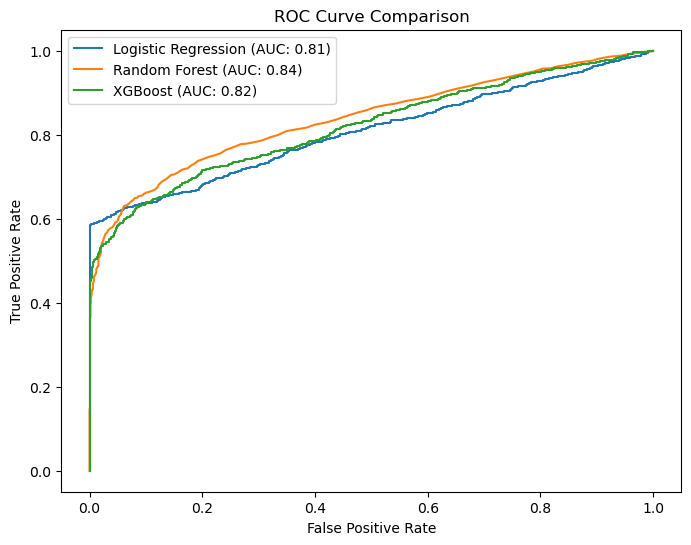


Ensembling Models...


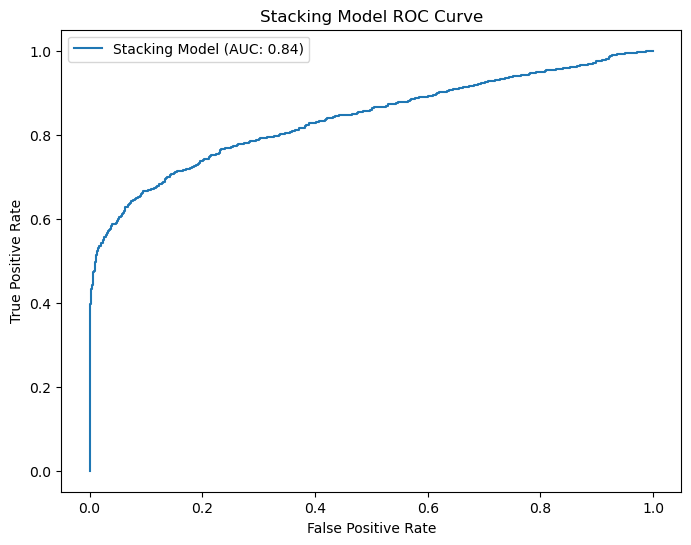

Final Stacking Model Performance:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      1339
           1       0.84      0.69      0.76      1339

    accuracy                           0.78      2678
   macro avg       0.79      0.78      0.78      2678
weighted avg       0.79      0.78      0.78      2678

AUC Score: 0.8377931877645474
Confusion Matrix:
[[1162  177]
 [ 418  921]]


In [16]:

class HeartAttackPredictionPipeline:
    def __init__(self, df: pd.DataFrame):
        """Initialize the pipeline with the dataset."""
        self.df = df
    
    def preprocess_data(self):
        """Feature engineering, encoding, balancing, transformation, and train-test split."""
        print("\nPreprocessing Data...")
        df = self.df.copy()
        
        # Drop irrelevant columns
        df.drop(columns=["Patient_ID"], inplace=True, errors='ignore')
        
        # Feature Engineering: Create interaction terms
        if 'LDL_Level' in df.columns and 'HDL_Level' in df.columns:
            df['LDL_HDL_Ratio'] = df['LDL_Level'] / (df['HDL_Level'] + 1)
        if 'Systolic_BP' in df.columns and 'Diastolic_BP' in df.columns:
            df['BP_Mean'] = (df['Systolic_BP'] + df['Diastolic_BP']) / 2
        
        # Encode categorical variables
        categorical_features = ['State_Name', 'Gender']
        df_encoded = pd.get_dummies(df, columns=categorical_features)
        
        # Apply log transformation to skewed features
        skewed_cols = ['Cholesterol_Level', 'Triglyceride_Level', 'LDL_Level', 'HDL_Level', 'Annual_Income']
        for col in skewed_cols:
            if col in df_encoded.columns:
                df_encoded[col] = np.log1p(df_encoded[col])
        
        # Define features and target
        X = df_encoded.drop(columns=['Heart_Attack_Risk'])
        y = df_encoded['Heart_Attack_Risk']
        
        # Balance classes using SMOTETomek
        smote = SMOTETomek(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)
        
        # Standardization
        scaler = StandardScaler()
        X_resampled = scaler.fit_transform(X_resampled)
        
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
        
        return X_train, X_test, y_train, y_test
    
    def train_models(self, X_train, X_test, y_train, y_test):
        """Train Logistic Regression, Random Forest, and XGBoost with Grid Search for best parameters."""
        print("\nTraining Models...")
        
        models = {
            'Logistic Regression': LogisticRegression(),
            'Random Forest': RandomForestClassifier(),
            'XGBoost': XGBClassifier()
        }
        
        param_grid = {
            'Logistic Regression': {'C': [0.1, 1, 10]},
            'Random Forest': {'n_estimators': [300], 'max_depth': [None], 'class_weight': ['balanced'], 'min_samples_split': [2], 'min_samples_leaf': [1]},
            'XGBoost': {'n_estimators': [300], 'learning_rate': [0.05], 'max_depth': [6], 'scale_pos_weight': [1.5]}
        }
        
        best_models = {}
        plt.figure(figsize=(8, 6))
        
        for name, model in models.items():
            print(f"Tuning {name}...")
            grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='recall', n_jobs=-1)
            grid_search.fit(X_train, y_train)
            best_models[name] = grid_search.best_estimator_
            
            y_pred = grid_search.best_estimator_.predict(X_test)
            y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
            
            print(f"\nBest Parameters for {name}: {grid_search.best_params_}")
            print(classification_report(y_test, y_pred))
            print("AUC Score:", roc_auc_score(y_test, y_pred_proba))
            print("Confusion Matrix:")
            print(confusion_matrix(y_test, y_pred))
            
            plt.plot(fpr, tpr, label=f"{name} (AUC: {roc_auc_score(y_test, y_pred_proba):.2f})")
        
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve Comparison")
        plt.legend()
        plt.show()
        
        return best_models
    
    def ensemble_model(self, best_models, X_train, X_test, y_train, y_test):
        """Create a stacking ensemble model with the best models."""
        print("\nEnsembling Models...")
        
        meta_model = LogisticRegression()
        stacking_model = StackingClassifier(
            estimators=[('rf', best_models['Random Forest']),
                        ('xgb', best_models['XGBoost'])],
            final_estimator=meta_model
        )
        
        stacking_model.fit(X_train, y_train)
        y_pred = stacking_model.predict(X_test)
        y_pred_proba = stacking_model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"Stacking Model (AUC: {roc_auc_score(y_test, y_pred_proba):.2f})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Stacking Model ROC Curve")
        plt.legend()
        plt.show()
        
        print("Final Stacking Model Performance:")
        print(classification_report(y_test, y_pred))
        print("AUC Score:", roc_auc_score(y_test, y_pred_proba))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        
        return stacking_model
    
    def run_pipeline(self):
        """Execute the entire pipeline."""
        X_train, X_test, y_train, y_test = self.preprocess_data()
        best_models = self.train_models(X_train, X_test, y_train, y_test)
        final_model = self.ensemble_model(best_models, X_train, X_test, y_train, y_test)
        return final_model


df = pd.read_csv("data/heart_attack_prediction_india.csv")
pipeline = HeartAttackPredictionPipeline(df)
final_model = pipeline.run_pipeline()

### **Observations**

1. **Logistic Regression achieves a recall of 58% for the positive class** (heart attack cases), meaning it **misses 42% of actual cases**, which may not be ideal for a high-risk medical prediction task. However, its **precision is 100%, meaning all predicted positive cases are correct**.

2. **Random Forest outperforms Logistic Regression in recall (65%)**, indicating it **detects more true heart attack cases**, but **it has a slight drop in precision (88%)** compared to Logistic Regression.

3. **XGBoost has a balanced recall of 74% and precision of 73%**, making it the most **stable model between identifying true positives and minimizing false positives**. However, its overall accuracy (73%) is lower than the other models.

4. **The Stacking Model improves recall to 69% while maintaining an AUC score of 0.837**, demonstrating that combining models improves predictive power. However, it still has **418 false negatives**, which could be optimized further.

5. **The AUC score for all models is relatively close (Logistic Regression: 0.807, Random Forest: 0.837, XGBoost: 0.819, Stacking: 0.838)**, suggesting **Random Forest and Stacking provide the best overall trade-offs between recall and precision**.

# **Conclusion**

This study focused on **two main objectives**:  
1️⃣ To understand patterns in heart attack risk factors.  
2️⃣ To develop a machine learning model for heart attack risk classification.  

The **EDA findings revealed** that lifestyle factors such as **smoking, alcohol consumption, and stress levels** significantly contribute to heart attack risk. Additionally, patients with **hypertension, obesity, and high LDL levels** had a **higher likelihood of heart attacks**, highlighting the importance of these medical indicators in risk assessment.  

In the **predictive modeling phase**, the **Stacking model performed best**, with a recall of **69%**, meaning it successfully identified 69% of high-risk patients. However, the **false negative rate remains a concern**, as missing heart attack cases could have severe consequences. **Further improvements, such as better feature selection, threshold tuning, and incorporating real-time patient monitoring data, could help refine predictions.**


# **Recommendations**

1. **Prioritize Regular Screening for High-Risk Individuals**  
   - The data indicates that **patients with hypertension, high LDL levels, and obesity** are at **higher risk of heart attacks**.  
   - **Action:** Healthcare providers should **offer routine cardiovascular screenings** for individuals with these conditions to detect early warning signs.  

2. **Promote Lifestyle Interventions Based on Risk Patterns**  
   - The data shows that **smoking, alcohol consumption, and physical inactivity** are strongly correlated with heart attack risk.  
   - **Action:** Public health campaigns should **focus on reducing smoking and alcohol consumption** while **encouraging physical activity** in at-risk populations.  

3. **Enhance Emergency Response Strategies for High-Risk Groups**  
   - The dataset reveals that **patients with longer emergency response times have poorer outcomes** in heart attack cases.  
   - **Action:** **Optimize ambulance response times** in regions where high-risk patients reside and **improve accessibility to immediate medical care** to increase survival rates.  
